# Dependências 

In [23]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from utils import plot

%matplotlib inline

print(tf.__version__)

1.12.0


# Hello, Tensorflow!

In [5]:
hello = tf.constant('Hello, Tensorflow!')
sess = tf.Session()
print(sess.run(hello))

b'Hello, Tensorflow!'


# Operações Básicas

In [7]:
a = tf.constant(2)
b = tf.constant(3)

print(a + b)
print(a * b)

Tensor("add_1:0", shape=(), dtype=int32)
Tensor("mul:0", shape=(), dtype=int32)


In [15]:
with tf.Session() as sess:
    print('adição')
    print(sess.run(a + b))
    print(sess.run(tf.add(a, b)))
    print()
    
    print('subtração')    
    print(sess.run(a - b))
    print(sess.run(tf.subtract(a, b)))
    print()
    
    print('multiplicação')    
    print(sess.run(a * b))
    print(sess.run(tf.multiply(a, b)))
    print()
    
    print('divisão')    
    print(sess.run(a / b))
    print(sess.run(tf.div(a, b)))
    print(sess.run(tf.divide(a, b)))
    print()
    
    print('potenciação')
    print(sess.run(a ** b))
    print(sess.run(tf.pow(a, b)))
    print()

adição
5
5

subtração
-1
-1

multiplicação
6
6

divisão
0.6666666666666666
0
0.6666666666666666

potenciação
8
8



In [23]:
matrix1 = tf.constant([[1.0, 2.0]])
matrix2 = tf.constant([[3.0], [4.0]])
product = tf.matmul(matrix1, matrix2)
multiply = tf.multiply(matrix1, matrix2)

with tf.Session() as sess:
    print(sess.run(product))
    print(sess.run(multiply))

[[11.]]
[[3. 6.]
 [4. 8.]]


In [24]:
vector1 = tf.constant([5.0, 6.0])
vector2 = tf.constant([7.0, 8.0])

with tf.Session() as sess:
    print(sess.run(tf.multiply(vector1, vector2)))
    print(sess.run(tf.multiply(matrix1, vector1)))
    print(sess.run(tf.multiply(matrix2, vector2)))

[35. 48.]
[[ 5. 12.]]
[[21. 24.]
 [28. 32.]]


# Tipos de Variáveis 

### Variables

In [30]:
v1 = tf.Variable(2.0)
v2 = tf.Variable([1.0, 2.0, 3.0])

print(v1)
print(v2)

<tf.Variable 'Variable_3:0' shape=() dtype=float32_ref>
<tf.Variable 'Variable_4:0' shape=(3,) dtype=float32_ref>


In [33]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(v1 * v2))

[2. 4. 6.]


### Placeholders

In [27]:
a = tf.placeholder(tf.int32)
b = tf.placeholder(tf.int32)

add = tf.add(a, b)
mul = tf.multiply(a, b)

with tf.Session() as sess:
    print(sess.run(add, feed_dict={a: 2, b: 3}))
    print(sess.run(mul, feed_dict={a: 4, b: 5}))

5
20


# Eager execution

In [2]:
tf.enable_eager_execution()

In [8]:
a = tf.constant(2)
b = tf.constant(3)

print('a + b = {}'.format(a + b))
print('a * b = {}'.format(a * b))

a + b = 5
a * b = 6


In [15]:
a = tf.constant([[2.0, 1.0], [1.0, 0.0]], dtype=tf.float32)
b = np.array([[3.0, 0.0], [5.0, 1.0]], dtype=np.float32)

add = a + b
mul = tf.matmul(a, b)

print(add)
print(mul)

tf.Tensor(
[[5. 1.]
 [6. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[11.  1.]
 [ 3.  0.]], shape=(2, 2), dtype=float32)


# Exemplos

### Classificação com Rede Neural Simples

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


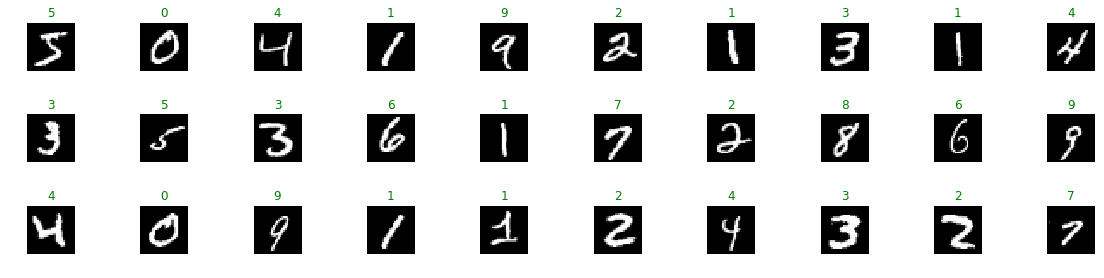

In [3]:
plot.image_batch(x_train[:30], y_train[:30])

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=5, validation_split=0.3)
model.evaluate(x_test, y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Train on 42000 samples, validate on 18000 samples
Epoch 1/5
42000/42000 [==============================] - 2s 41us/step - loss: 0.3046 - acc: 0.9131 - val_loss: 0.1835 - val_acc: 0.9467
Epoch 2/5
42000/42000 [==============================] - 2s 36us/step - loss: 0.1371 - acc: 0.9597 - val_loss: 0.1357 - val_acc: 0.9589
Epoch 3/5
42000/42000 [==============================] - 2s 36us/step - loss: 

[0.09646237155329436, 0.9724]

### Classificação com Rede Neural Convolucional

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train.reshape(-1, 28, 28, 1), y_train, batch_size=32, epochs=5, validation_split=0.3)
model.evaluate(x_test.reshape(-1, 28, 28, 1), y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 16)        1168      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 7, 7, 32)          4640      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 3, 3, 64)          18496     
__________

[0.03840717237161589, 0.9877]

### Regressão Multivariada

In [16]:
data = np.loadtxt('data/diabetes.csv', delimiter=',', skiprows=1)
x, y = data[:, :-1], data[:, -1]

print(x.shape, y.shape)

(442, 10) (442,)


In [44]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=50, activation='relu', input_dim=10),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),    
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.summary()

model.compile(optimizer='adam', loss='mse', metrics=['mse'])

hist = model.fit(x, y, batch_size=32, epochs=50, validation_split=0.3)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 50)                550       
_________________________________________________________________
dropout_23 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_65 (Dense)             (None, 50)                2550      
_________________________________________________________________
dropout_24 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_66 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_67 (Dense)             (None, 1)                 51        
Total params: 5,701
Trainable params: 5,701
Non-trainable params: 0
_________________________________________________________________
Train on

309/309 [==============================] - 0s 42us/step - loss: 4248.3324 - mean_squared_error: 4248.3324 - val_loss: 2920.2189 - val_mean_squared_error: 2920.2189
Epoch 41/50
309/309 [==============================] - 0s 45us/step - loss: 4497.2722 - mean_squared_error: 4497.2722 - val_loss: 2911.3365 - val_mean_squared_error: 2911.3365
Epoch 42/50
309/309 [==============================] - 0s 42us/step - loss: 4181.2864 - mean_squared_error: 4181.2864 - val_loss: 2934.4927 - val_mean_squared_error: 2934.4927
Epoch 43/50
309/309 [==============================] - 0s 42us/step - loss: 4303.3088 - mean_squared_error: 4303.3088 - val_loss: 2933.0093 - val_mean_squared_error: 2933.0093
Epoch 44/50
309/309 [==============================] - 0s 39us/step - loss: 4145.1610 - mean_squared_error: 4145.1610 - val_loss: 2912.4059 - val_mean_squared_error: 2912.4059
Epoch 45/50
309/309 [==============================] - 0s 35us/step - loss: 4076.0349 - mean_squared_error: 4076.0349 - val_loss: 29

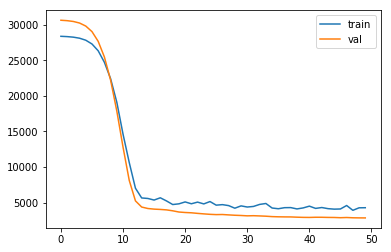

In [45]:
hist_dict = hist.history
loss_train = hist_dict['loss']
loss_val = hist_dict['val_loss']

plt.figure()
plt.plot(loss_train, label='train')
plt.plot(loss_val, label='val')
plt.legend()